## Observations and Insights 

1- Gender distrubution is almost same.
2-Among 4 drug regimen compared, Capomulin and Ramicane regimen have smaller tumor volumeas final. 
3- r-suared with the value of 0.71 states that our data fits good into regression model. 
4-There is a strong positive correlation with the value of 0.84 between Mouse weight and tumor volume. It shows us that the tumor volume also increases when the mouse weight increases. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#mouse_metadata.shape

In [4]:
#mouse_metadata["Mouse ID"].nunique()

In [5]:
study_results.head()
#study_results.shape

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
combined_data.head()
#combined_data.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mouse
combined_data["Mouse ID"].nunique()

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_df =combined_data.loc[combined_data["Mouse ID"] == "g989"]

duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
duplicated_df.shape

(13, 8)

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [15]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume 

In [16]:
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

#Create dataframe
summary_df = pd.DataFrame({"Mean":mean, "Median": median, "Variance":var, "Standard Deviation": std, "Standart Error":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,Standart Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line
# summary_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
# summary_agg
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
summary_agg  = clean_df.groupby("Drug Regimen").agg(aggregations)
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen 
grouped_by_drug = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
grouped_df = grouped_by_drug.to_frame()
grouped_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


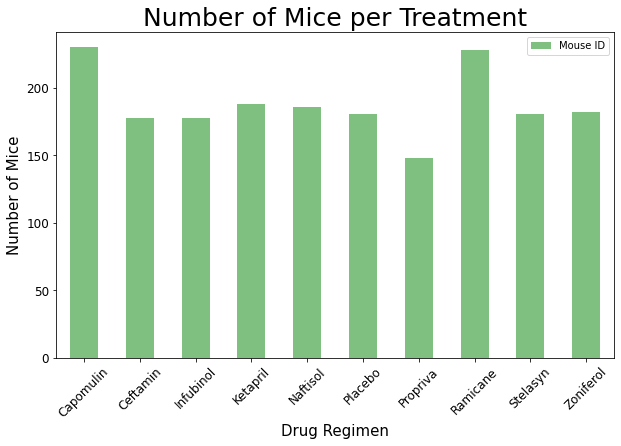

In [19]:
#Use pandas to generate a bar plot
num_mice_data = grouped_df.plot.bar(figsize = (10,6), fontsize =12, color= "green", alpha = 0.5, align = "center")
plt.xlabel("Drug Regimen", fontsize = 15)
plt.ylabel("Number of Mice", fontsize = 15)
plt.xticks(rotation = 45)
plt.title("Number of Mice per Treatment", fontsize =25)
plt.savefig("Images/number_mice_treatment.png", bbox_inches = "tight")
plt.show()

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Define x axis of the bar chart
x_axis = np.arange(len(grouped_by_drug))
#y axis of the bar chart
mice_count_list = grouped_by_drug.to_list()

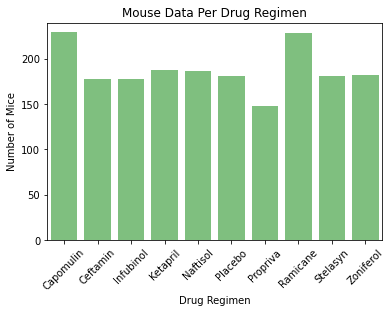

In [21]:
# num_mouse_df = num_mouse.to_frame()
# y_axis = num_mouse_df["Mouse ID"]
y_axis  = mice_count_list
#Plot bar graph
plt.bar(x_axis, y_axis, align="center", color='g', alpha=0.5 )

#tick mark management
tick_locations = [value for value in x_axis]

ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.xticks(tick_locations, ticks, rotation = 45)
plt.xlim(-0.50, len(x_axis)-0.50)
plt.ylim(0, max(y_axis)+10)
plt.title("Mouse Data Per Drug Regimen")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of Mice")
plt.savefig("Images/plot_num_mice_treatment.png")

# plt.tight_layout()

plt.show()

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# count_gender = clean_df["Sex"].value_counts()
# count_gender_df = count_gender.to_frame()
# count_gender_df.
count_gender = combined_data.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(count_gender.size())
gender_df

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [79]:
sum_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
sum_gender.columns = ["Total Count"]
sum_gender

,Total Count
Sex,
Female,124
Male,125


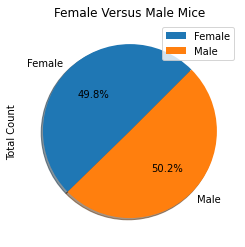

In [83]:
gender_pandas = sum_gender.plot.pie(y ="Total Count", title="Female Versus Male Mice", shadow= True, 
                                startangle = 45, autopct = "%1.1f%%")
plt.savefig("Images/gender_distribution.png")
plt.show()

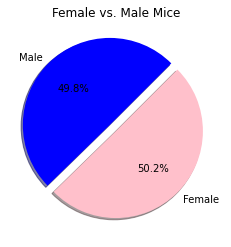

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Male", "Female"]
explode = [0.10, 0]
counts = [124,125]
colors =["blue", "pink"]
plt.pie(counts, labels=labels, explode =explode, colors =colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.title("Female vs. Male Mice")
plt.savefig("Images/male&female.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_ID = combined_data.groupby("Mouse ID")
last_timepoint = group_ID["Timepoint"].max()
last_timepoint_df = last_timepoint.to_frame()
last_timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [26]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, combined_data, on = ["Mouse ID", "Timepoint"])
tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []


for x in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[x, "Drug Regimen"] == "Capomulin":
        tumor_vol_cap.append(tumor_volume_df.loc[x,"Tumor Volume (mm3)"])
        
    if tumor_volume_df.loc[x, "Drug Regimen"] == "Ramicane":
        tumor_vol_ram.append(tumor_volume_df.loc[x,"Tumor Volume (mm3)"])
        
    if tumor_volume_df.loc[x, "Drug Regimen"] == "Infubinol":
        tumor_vol_inf.append(tumor_volume_df.loc[x,"Tumor Volume (mm3)"])
        
    if tumor_volume_df.loc[x, "Drug Regimen"] == "Ceftamin":
        tumor_vol_cef.append(tumor_volume_df.loc[x,"Tumor Volume (mm3)"])
        
# Put four tumor vol lists into a list for for loop
tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []


for x in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[x]).quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"\n {treatments[x]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: { quartiles[0.5]}.")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
#Determine outliers    
    
    for y in range(len(tumor_vol[x])):
        if (tumor_vol[x][y] < lower_bound) or (tumor_vol[x][y] > upper_bound):
            outlier = tumor_vol[x][y]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")
    


 Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

 Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

 Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

 Ceftamin

<ipython-input-28-d4638a45137a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


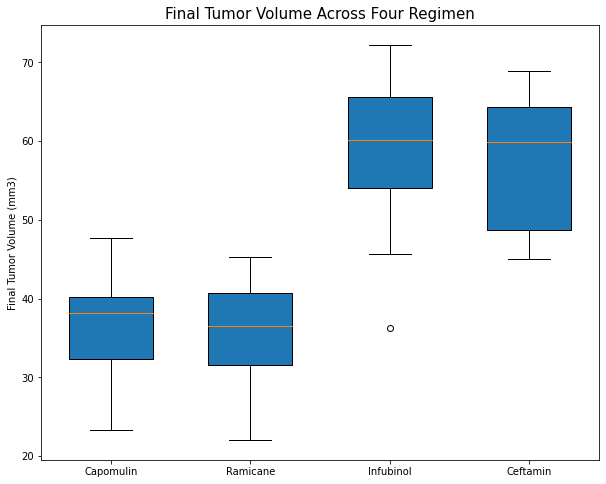

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize= (10,8))
ax1.set_title('Final Tumor Volume Across Four Regimen', fontsize = 15)
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, widths = 0.6, patch_artist=True,vert=True)
plt.savefig("Images/tumor_vol_boxplot.png")
plt.show()


## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_treatment = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
cap_treatment.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [30]:
line_df = cap_treatment.loc[cap_treatment["Mouse ID"] == "s185", :] 
line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


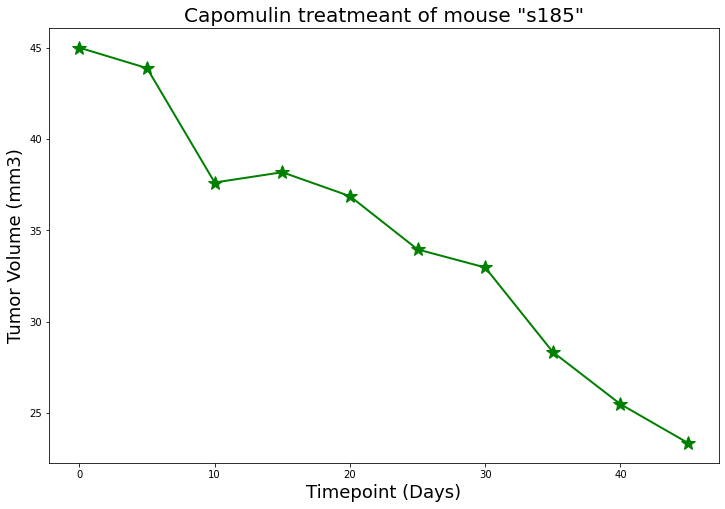

In [63]:
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title('Capomulin treatmeant of mouse "s185"',fontsize =20)
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,marker="*",color="green", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =18)
plt.ylabel('Tumor Volume (mm3)',fontsize =18)
plt.savefig("Images/capomulin_treatment.png", bbox_inches = "tight")
plt.show()

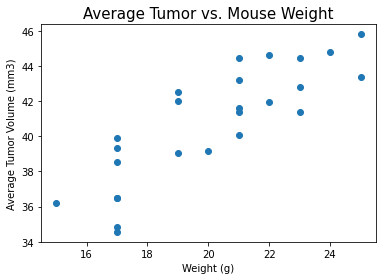

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = cap_treatment.groupby("Mouse ID")
cap_tumor_average = cap_df["Tumor Volume (mm3)"].mean()
mouse_weight = cap_df["Weight (g)"].unique()

plt.scatter(mouse_weight, cap_tumor_average)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor vs. Mouse Weight", fontsize = 15)
plt.savefig("Images/ave_tumor_vs_mouse_weight.png")
plt.show()                                  
                                

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight.astype(float)

y_values = cap_tumor_average
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factor is {round(correlation[0],2)}.")

The correlation between both factor is 0.84.


The r-squared is: 0.7088568047708717


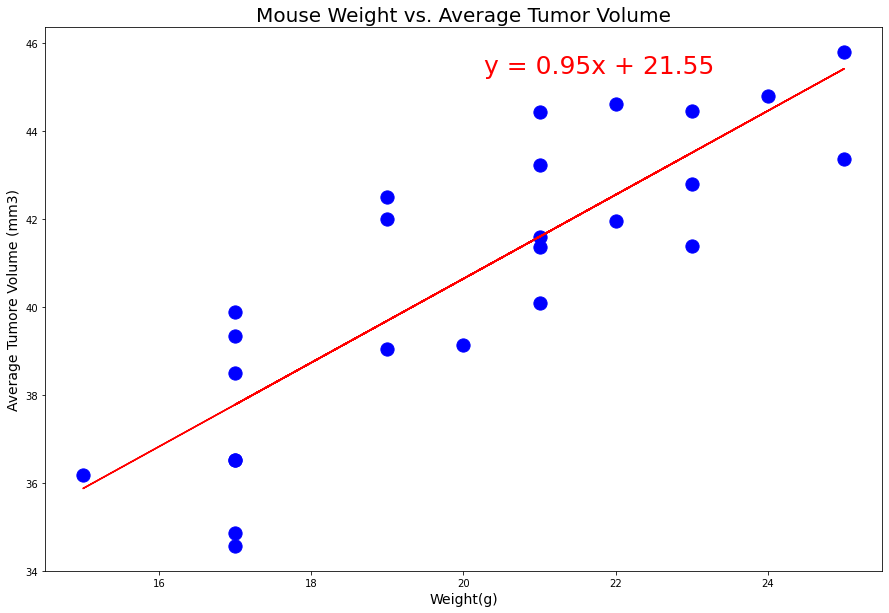

In [61]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight vs. Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40),xytext=(0.8, 0.95), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment = "top", fontsize=25, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/lin_reg_avg_tumor.png")
plt.show()